In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

sc.logging.print_header()

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.1 pandas==1.2.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
adt2 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_raw.h5ad')

In [3]:
adt3 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_bgsubtracted.h5ad')

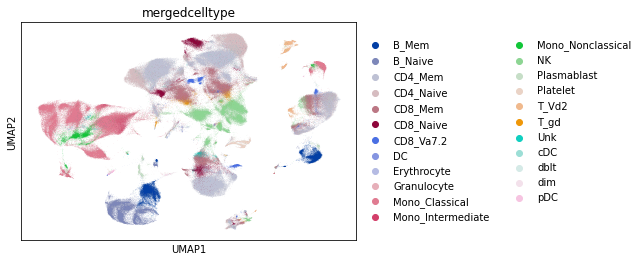

In [4]:
sc.pl.umap(adt2, color = 'mergedcelltype')

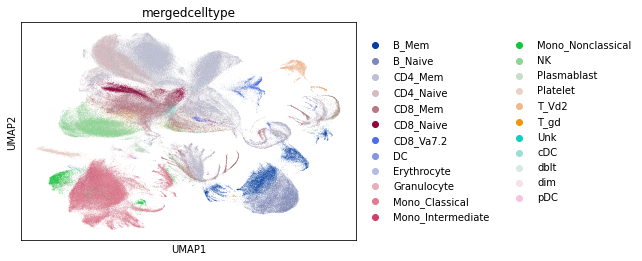

In [5]:
sc.pl.umap(adt3, color = 'mergedcelltype')

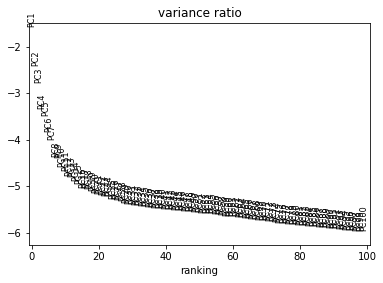

In [6]:
# pca
sc.tl.pca(adt2, svd_solver='arpack', n_comps = 100)
sc.pl.pca_variance_ratio(adt2, log=True, n_pcs = 100)

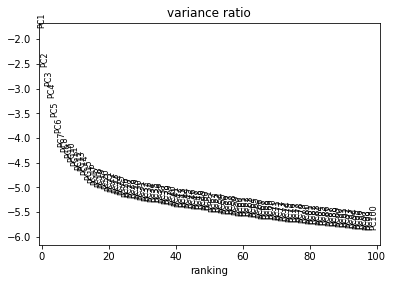

In [8]:
# pca
sc.tl.pca(adt3, svd_solver='arpack', n_comps = 100)
sc.pl.pca_variance_ratio(adt3, log=True, n_pcs = 100)

In [9]:
# neighbors
sc.pp.neighbors(adt2, n_neighbors=10, n_pcs=20)
# umap
sc.tl.umap(adt2, min_dist = 0.3)
# clusters
sc.tl.leiden(adt2)

In [10]:
# neighbors
sc.pp.neighbors(adt3, n_neighbors=10, n_pcs=20)
# umap
sc.tl.umap(adt3, min_dist = 0.3)
# clusters
sc.tl.leiden(adt3)

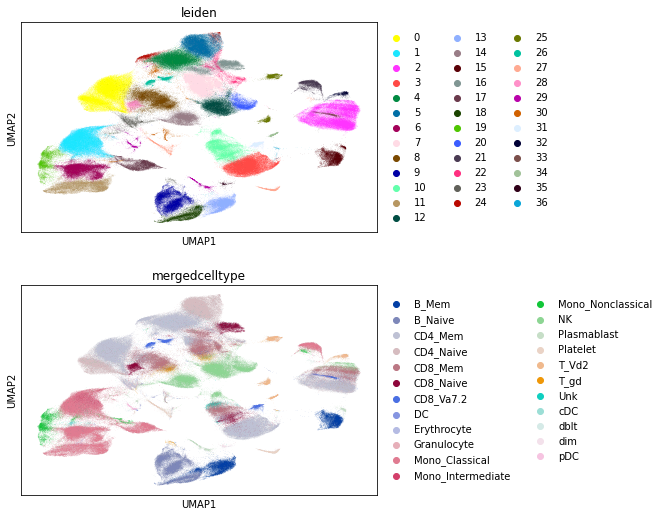

In [11]:
sc.pl.umap(adt2, color = ['leiden', 'mergedcelltype'], ncols = 1)

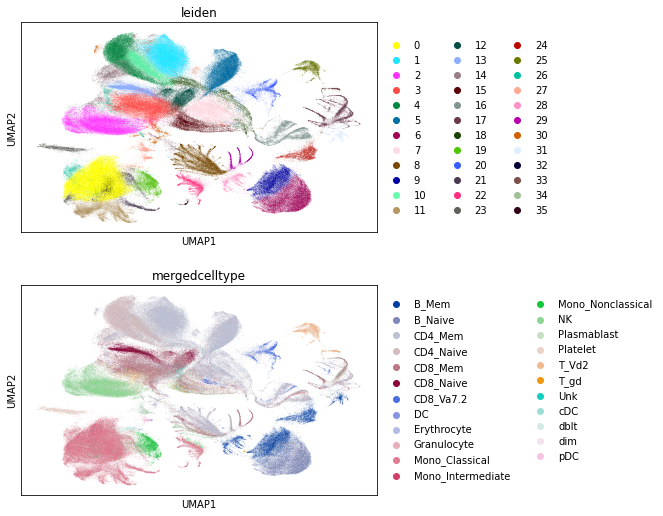

In [12]:
adt3.uns.pop('leiden_colors')
sc.pl.umap(adt3, color = ['leiden', 'mergedcelltype'], ncols = 1)

In [13]:
adt2.write_h5ad('raw/GSE161918_CITE_prepped_clr_raw.h5ad', compression = 'gzip')

In [14]:
adt3.write_h5ad('raw/GSE161918_CITE_prepped_clr_bgsubtracted.h5ad', compression = 'gzip')

In [15]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [17]:
adt2

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [18]:
adt3

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [19]:
## pop neighbhors
adt2.uns.pop('neighbors')
adt2.obsp = None
adt3.uns.pop('neighbors')
adt3.obsp = None

In [20]:
%%R -i adt2
saveRDS(adt2, 'raw/GSE161918_CITE_prepped_clr_raw.RDS')

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata2ri/r2py.py:102: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


In [21]:
%%R -i adt3
saveRDS(adt3, 'raw/GSE161918_CITE_prepped_clr_bgsubtracted.RDS')

In [23]:
import tools

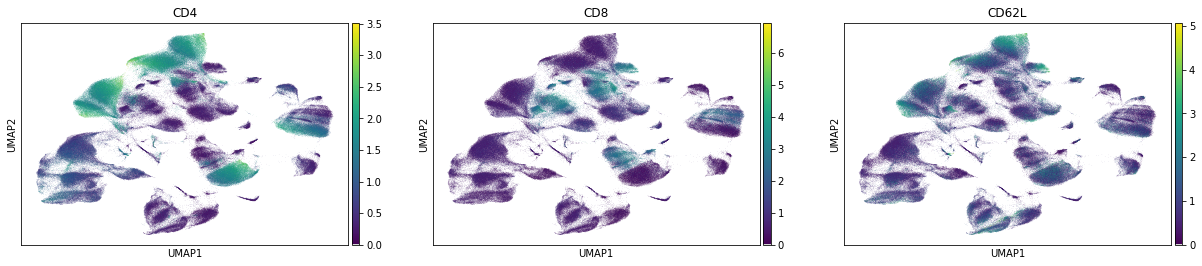

In [24]:
sc.pl.umap(adt2, color = ['CD4', 'CD8', 'CD62L'], color_map = tools.cmp())

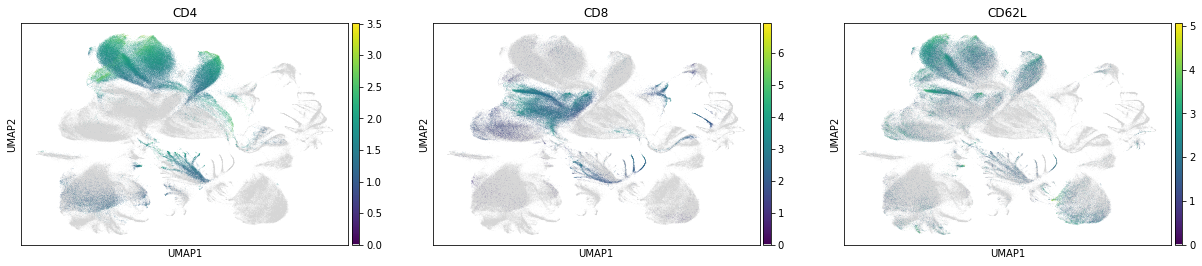

In [25]:
sc.pl.umap(adt3, color = ['CD4', 'CD8', 'CD62L'], color_map = tools.cmp())